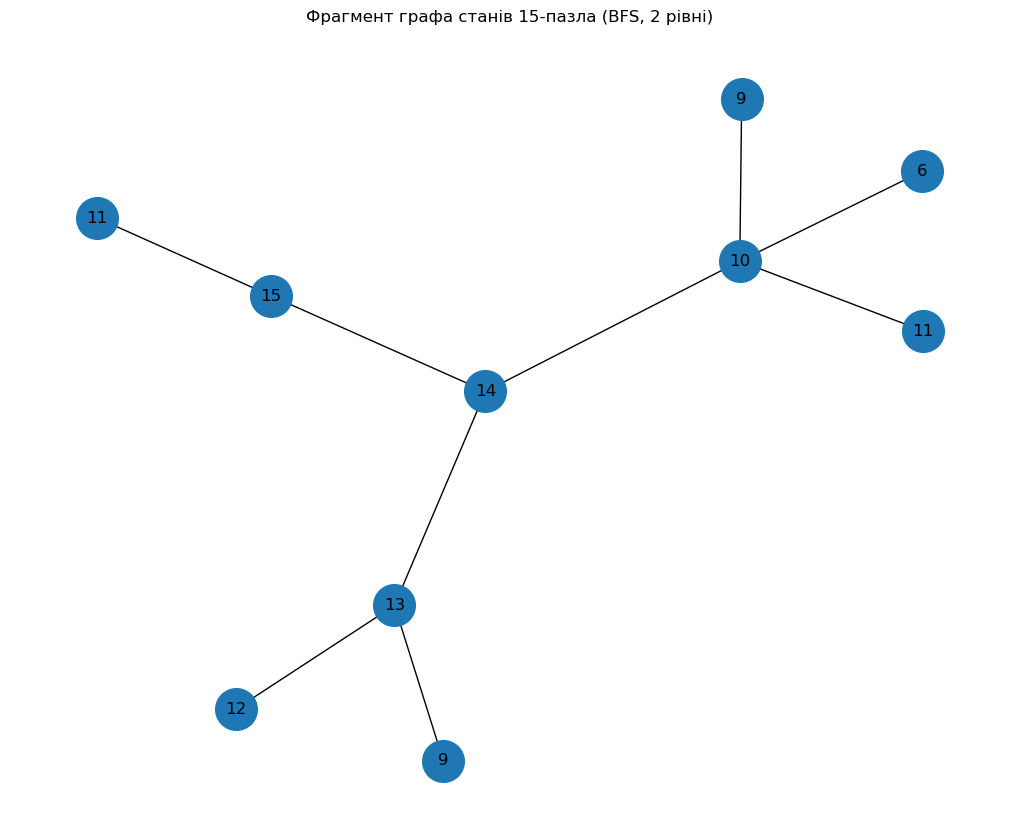

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Початковий стан
start = (
    1, 2, 3, 4,
    5, 6, 7, 8,
    9, 10, 11, 12,
    13, 14, 0, 15
)

# Допустимі рухи
moves = [(-1,0),(1,0),(0,-1),(0,1)]

def neighbors(state):
    res = []
    zero = state.index(0)
    r, c = zero // 4, zero % 4

    for dr, dc in moves:
        nr, nc = r + dr, c + dc
        if 0 <= nr < 4 and 0 <= nc < 4:
            ni = nr * 4 + nc
            new = list(state)
            new[zero], new[ni] = new[ni], new[zero]
            res.append(tuple(new))
    return res

# BFS до заданої глибини
def build_graph(start, max_depth=2):
    G = nx.Graph()
    queue = deque([(start, 0)])
    visited = {start}

    while queue:
        state, depth = queue.popleft()
        if depth == max_depth:
            continue

        for n in neighbors(state):
            G.add_edge(state, n)
            if n not in visited:
                visited.add(n)
                queue.append((n, depth + 1))
    return G

G = build_graph(start, max_depth=2)

# Підписи вершин (короткі)
labels = {s: str(s.index(0)) for s in G.nodes()}

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=900)
nx.draw_networkx_labels(G, pos, labels)
plt.title("Фрагмент графа станів 15-пазла (BFS, 2 рівні)")
plt.show()


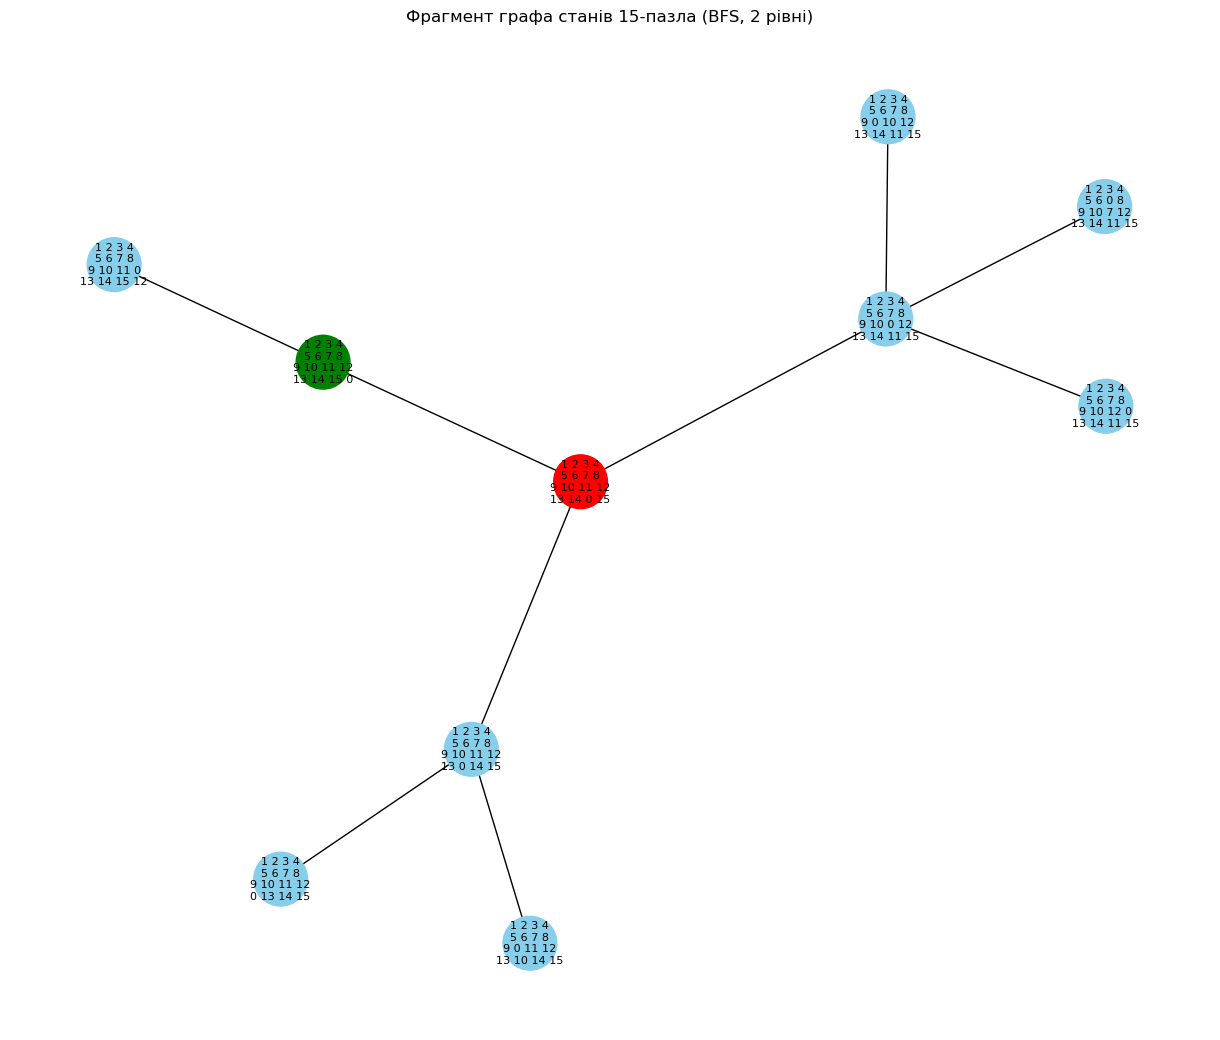

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Початковий стан
start = (
    1, 2, 3, 4,
    5, 6, 7, 8,
    9, 10, 11, 12,
    13, 14, 0, 15
)

goal = (
    1, 2, 3, 4,
    5, 6, 7, 8,
    9, 10, 11, 12,
    13, 14, 15, 0
)

# Допустимі рухи
moves = [(-1,0),(1,0),(0,-1),(0,1)]

def neighbors(state):
    res = []
    zero = state.index(0)
    r, c = zero // 4, zero % 4
    for dr, dc in moves:
        nr, nc = r + dr, c + dc
        if 0 <= nr < 4 and 0 <= nc < 4:
            ni = nr * 4 + nc
            new = list(state)
            new[zero], new[ni] = new[ni], new[zero]
            res.append(tuple(new))
    return res

def build_graph(start, max_depth=2):
    G = nx.Graph()
    queue = deque([(start, 0)])
    visited = {start}

    while queue:
        state, depth = queue.popleft()
        if depth == max_depth:
            continue
        for n in neighbors(state):
            G.add_edge(state, n)
            if n not in visited:
                visited.add(n)
                queue.append((n, depth + 1))
    return G

G = build_graph(start, max_depth=2)

# Підписи вершин: покажемо 4×4 у вигляді рядка
labels = {s: '\n'.join([' '.join(map(str, s[i*4:(i+1)*4])) for i in range(4)]) for s in G.nodes()}

# Кольори: початковий стан червоний, кінцевий зелений, інші – сині
node_colors = []
for n in G.nodes():
    if n == start:
        node_colors.append('red')
    elif n == goal:
        node_colors.append('green')
    else:
        node_colors.append('skyblue')

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=1500, node_color=node_colors)
nx.draw_networkx_labels(G, pos, labels, font_size=8)
plt.title("Фрагмент графа станів 15-пазла (BFS, 2 рівні)")
plt.show()
